In [48]:
# Import Packages
import pandas as pd
import numpy as np     
import matplotlib.pyplot as plt     

# Dataset 1

In [49]:
df1 = pd.read_csv('earthquake_data.csv')
df1.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [51]:
df1 = df1.dropna() # Menghapus nilai kosong pada dataset


In [52]:
# Menghitung data pada variabel target
df1['alert'].value_counts()

green     47
yellow    24
orange    16
red        9
Name: alert, dtype: int64

In [53]:
data_column_category =df1.select_dtypes(exclude=[np.number]).columns # Memilih variabel dengan tipe data kecuali variabel dengan tipe data numerik lalu disimpan pada df_categorical_column
data_column_category

Index(['title', 'date_time', 'alert', 'net', 'magType', 'location',
       'continent', 'country'],
      dtype='object')

In [54]:
from sklearn.preprocessing import LabelEncoder # Memanggil fungsi LabelEncoder yang berasal dari library sklearn untuk melakukan label encoding

label_encoder = LabelEncoder() # Menggunakan fungsi LabelEncoder yang di definisikan ke label_encoder
# Melakukan perulangan untuk setiap variabel yang bernilai kategrik untuk dilakukan trasnsform dengan menggunakan fungsi LabelEncoder akan dilakupan pada setiap variabel yang bernilai kategorik
for i in data_column_category:
  df1[i] = label_encoder.fit_transform(df1[i])
print('Label Encoded Data: ')

df1.head()

Label Encoded Data: 


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,57,7.0,63,8,7,0,1,768,3,117,0.509,17.0,2,14.000,-9.7963,159.596,43,4,25
8,43,6.8,62,8,7,3,1,1179,3,175,2.137,92.0,2,20.000,18.3300,-102.913,4,3,15
9,86,7.6,51,9,8,3,1,1799,3,271,1.153,69.0,2,26.943,18.3667,-103.252,4,3,15
10,54,6.9,49,9,9,3,1,887,3,215,0.401,34.0,2,10.000,23.1444,121.307,82,1,26
11,7,6.5,43,7,7,0,1,756,3,178,0.430,54.0,2,10.000,23.0290,121.348,42,1,26


## Feature Selection using Filters

In [55]:
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [56]:
# Split Data
# Mengambil kolom 'alert' dari dataframe df1 dan menyimpannya dalam variabel y sebagai target values.
y = df1.pop('alert').values 

# Mengambil nilai-nilai dari dataframe df1 dan menyimpannya dalam variabel X_raw sebagai fitur-fitur.
X_raw = df1.values 

# Membagi data menjadi data latih dan data uji menggunakan fungsi train_test_split.
# Data latih: 50% dari dataset, random_state=1 digunakan untuk memastikan hasil yang konsisten setiap kali dijalankan.
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, random_state=1, test_size=1/2) 

# Menggunakan MinMaxScaler untuk melakukan penskalaan fitur-fitur dalam rentang 0 hingga 1.
scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_tr_raw) # Melakukan penskalaan pada data latih.
X_test = scaler.transform(X_ts_raw) # Melakukan penskalaan pada data uji.

# Menyimpan nama-nama fitur dalam variabel feature_names.
feature_names = df1.columns 

# Menampilkan bentuk (shape) dari data latih (X_train) dan data uji (X_test).
# Ini berguna untuk memastikan bahwa data telah dibagi dan diolah dengan benar.
X_train.shape, X_test.shape 


((48, 18), (48, 18))

In [57]:
# Feature Scores

# Menghitung skor chi-square (chi2) dan nilai p-value dari data pelatihan (X_train) terhadap target (y_train)
chi2_score, pval = chi2(X_train, y_train)

# Menggantikan nilai NaN dalam skor chi2 dengan angka nol menggunakan np.nan_to_num()
chi2_score = np.nan_to_num(chi2_score)

chi2_score

array([1.27534099, 1.06304745, 0.63905929, 1.3743555 , 0.88668159,
       3.61010101, 7.55248163, 0.03504762, 2.53459463, 1.0629093 ,
       0.55511974, 0.01957447, 2.12717638, 0.15176551, 0.72747379,
       0.20173819, 2.25793583, 0.49079937])

In [58]:
# Menghitung skor informasi mutual (mutual information) antara fitur-fitur (X_train) dan label (y_train)
i_scores = mutual_info_classif(X_train, y_train)

# Menyimpan hasil skor informasi mutual dalam variabel i_scores
i_scores


array([0.05887689, 0.        , 0.        , 0.11909806, 0.34199747,
       0.1299324 , 0.53343793, 0.2620077 , 0.1012183 , 0.        ,
       0.        , 0.1485961 , 0.1111047 , 0.27399164, 0.15733925,
       0.        , 0.21007824, 0.15084985])

In [59]:
# Simpan Skor

# Menggunakan library pandas dan membuat DataFrame baru dengan tiga kolom: 'Mutual Info.', 'Chi Square', dan 'Feature'
df1 = pd.DataFrame({'Mutual Info.': i_scores, 'Chi Square': chi2_score, 'Feature': feature_names})

# Mengatur indeks DataFrame ke kolom 'Feature', menggantikan indeks default
df1.set_index('Feature', inplace=True)

# Mengurutkan DataFrame berdasarkan nilai pada kolom 'Mutual Info.' secara menurun (descending order)
df1.sort_values('Mutual Info.', inplace=True, ascending=False)

# Menampilkan DataFrame yang telah diubah
df1


,Mutual Info.,Chi Square
Feature,,
sig,0.533438,7.552482
mmi,0.341997,0.886682
latitude,0.273992,0.151766
net,0.262008,0.035048
continent,0.210078,2.257936
longitude,0.157339,0.727474
country,0.150850,0.490799
magType,0.148596,0.019574
tsunami,0.129932,3.610101


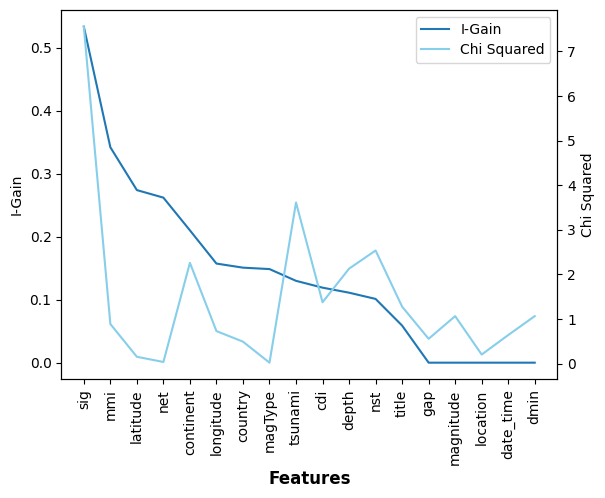

In [60]:
# Plotting the Filter score

import matplotlib.pyplot as plt

# Membuat subplots dan menetapkan variabel fig dan ax untuk subplot utama
fig, ax = plt.subplots()

# Membuat variabel rr yang berisi rentang indeks fitur
rr = range(0, len(feature_names))

# Membuat sumbu kedua yang bersifat sejajar dengan sumbu x utama
ax2 = ax.twinx()

# Menampilkan grafik I-Gain dengan warna default, menggunakan data dari kolom 'Mutual Info.' pada DataFrame df1
ax.plot(df1.index, df1['Mutual Info.'], label='I-Gain')

# Menampilkan grafik Chi Squared dengan warna skyblue, menggunakan data dari kolom 'Chi Square' pada DataFrame df1
ax2.plot(df1.index, df1['Chi Square'], color='skyblue', label='Chi Squared')

# Menetapkan posisi tick pada sumbu x sesuai dengan variabel rr
ax.set_xticks(rr)

# Menetapkan label pada sumbu x dengan menggunakan indeks DataFrame df1 yang dirotasi sejajar dengan sumbu x
ax.set_xticklabels(list(df1.index), rotation=90)

# Menetapkan label pada sumbu x dan y utama
ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('I-Gain')

# Menetapkan label pada sumbu y kedua
ax2.set_ylabel('Chi Squared')

# Menampilkan legenda pada grafik dengan posisi di kanan atas, sesuai dengan posisi sumbu utama
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
plt.show()  # Menampilkan grafik


In [61]:
from scipy import stats
stats.spearmanr(chi2_score, i_scores)

SpearmanrResult(correlation=0.02607023908006117, pvalue=0.9182147141292751)

## Metode Embedded (D-Tree)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [63]:
df3 = pd.read_csv('earthquake_data.csv')
print(df3.shape)
df3.head()


(782, 19)


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [64]:
df3 = df3.dropna() # Menghapus nilai kosong pada dataset


In [65]:
df3['alert'].value_counts()

green     47
yellow    24
orange    16
red        9
Name: alert, dtype: int64

In [66]:
data_column_category3 =df3.select_dtypes(exclude=[np.number]).columns # Memilih variabel dengan tipe data kecuali variabel dengan tipe data numerik lalu disimpan pada df_categorical_column
data_column_category3

Index(['title', 'date_time', 'alert', 'net', 'magType', 'location',
       'continent', 'country'],
      dtype='object')

In [67]:
from sklearn.preprocessing import LabelEncoder # Memanggil fungsi LabelEncoder yang berasal dari library sklearn untuk melakukan label encoding

label_encoder = LabelEncoder() # Menggunakan fungsi LabelEncoder yang di definisikan ke label_encoder
# Melakukan perulangan untuk setiap variabel yang bernilai kategrik untuk dilakukan trasnsform dengan menggunakan fungsi LabelEncoder akan dilakupan pada setiap variabel yang bernilai kategorik
for i in data_column_category3:
  df3[i] = label_encoder.fit_transform(df3[i])
print('Label Encoded Data: ')

df3.head()

Label Encoded Data: 


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,57,7.0,63,8,7,0,1,768,3,117,0.509,17.0,2,14.000,-9.7963,159.596,43,4,25
8,43,6.8,62,8,7,3,1,1179,3,175,2.137,92.0,2,20.000,18.3300,-102.913,4,3,15
9,86,7.6,51,9,8,3,1,1799,3,271,1.153,69.0,2,26.943,18.3667,-103.252,4,3,15
10,54,6.9,49,9,9,3,1,887,3,215,0.401,34.0,2,10.000,23.1444,121.307,82,1,26
11,7,6.5,43,7,7,0,1,756,3,178,0.430,54.0,2,10.000,23.0290,121.348,42,1,26


In [68]:
# Mengambil kolom 'alert' dari DataFrame df3 dan menyimpannya ke dalam variabel y
y = df3.pop('alert').values 

# Mengambil semua nilai dari DataFrame df3 (tanpa kolom 'alert') dan menyimpannya ke dalam variabel X
X = df3.values 

# Memisahkan data menjadi data latih (80%) dan data uji (20%) menggunakan train_test_split
# dengan pengaturan random_state=1 untuk hasil yang konsisten, dan test_size=0.2 untuk 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2) 

# Menyimpan nama-nama fitur (kolom) dari DataFrame df3 ke dalam variabel feature_names
feature_names = df3.columns 

# Menampilkan bentuk (jumlah baris dan kolom) dari data latih dan data uji
# Ini membantu memastikan bahwa data telah terbagi dengan benar untuk proses pelatihan dan pengujian model
X_train.shape, X_test.shape 


((76, 18), (20, 18))

In [69]:
# Mengimpor modul DecisionTreeClassifier dari pustaka scikit-learn
from sklearn.tree import DecisionTreeClassifier
# Membuat objek DecisionTreeClassifier dengan menggunakan kriteria 'entropy'
# Kriteria 'entropy' digunakan untuk mengukur ketidakpastian atau kekacauan dalam data
ftree = DecisionTreeClassifier(criterion='entropy')

# Melatih model Decision Tree menggunakan data pelatihan (X_train) dan label pelatihan (y_train)
ftree = ftree.fit(X_train, y_train)

# Menggunakan model yang telah dilatih untuk membuat prediksi menggunakan data uji (X_test)
y_pred = ftree.predict(X_test)

# Menghitung akurasi prediksi dengan membandingkan hasil prediksi (y_pred) dengan label sebenarnya (y_test)
acc = accuracy_score(y_pred, y_test)

# Menampilkan nilai akurasi prediksi pada set data uji dengan format persen desimal hingga dua angka di belakang koma
print("Test set accuracy: %4.2f" % (acc))


Test set accuracy: 0.75


[Text(0.4666666666666667, 0.9375, 'sig <= 1000.0\n76\n[38, 12, 8, 18]\n0'),
 Text(0.13333333333333333, 0.8125, 'longitude <= 78.282\n41\n[35, 0, 0, 6]\n0'),
 Text(0.06666666666666667, 0.6875, '23\n[23, 0, 0, 0]\n0'),
 Text(0.2, 0.6875, 'longitude <= 96.586\n18\n[12, 0, 0, 6]\n0'),
 Text(0.13333333333333333, 0.5625, '2\n[0, 0, 0, 2]\n3'),
 Text(0.26666666666666666, 0.5625, 'nst <= 196.5\n16\n[12, 0, 0, 4]\n0'),
 Text(0.13333333333333333, 0.4375, 'sig <= 689.5\n12\n[11, 0, 0, 1]\n0'),
 Text(0.06666666666666667, 0.3125, '1\n[0, 0, 0, 1]\n3'),
 Text(0.2, 0.3125, '11\n[11, 0, 0, 0]\n0'),
 Text(0.4, 0.4375, 'latitude <= 44.496\n4\n[1, 0, 0, 3]\n3'),
 Text(0.3333333333333333, 0.3125, '3\n[0, 0, 0, 3]\n3'),
 Text(0.4666666666666667, 0.3125, '1\n[1, 0, 0, 0]\n0'),
 Text(0.8, 0.8125, 'sig <= 1952.5\n35\n[3, 12, 8, 12]\n1'),
 Text(0.7333333333333333, 0.6875, 'magnitude <= 6.55\n27\n[3, 12, 0, 12]\n1'),
 Text(0.6, 0.5625, 'sig <= 1157.5\n4\n[3, 1, 0, 0]\n0'),
 Text(0.5333333333333333, 0.4375, '1\n

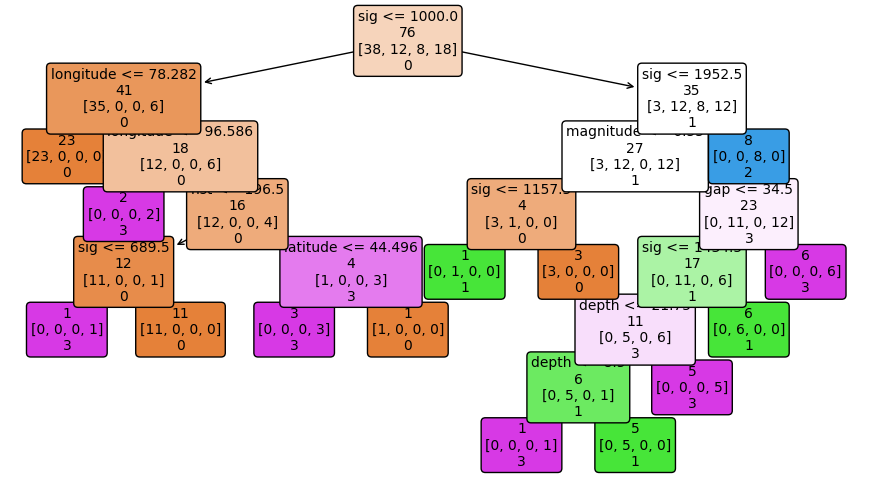

In [70]:

# Mengatur ukuran gambar grafik menjadi 11x6 inci
plt.figure(figsize=(11, 6))

# Menampilkan pohon ke dalam gambar menggunakan fungsi plot_tree
# ftree adalah objek pohon yang ingin divisualisasikan
# fontsize mengatur ukuran font teks dalam grafik pohon
# feature_names adalah daftar nama fitur yang akan ditampilkan dalam pohon
# class_names adalah daftar nama kelas yang akan ditampilkan dalam pohon (dalam hal ini, '0', '1', '2', dan '3')
# label mengatur tampilan label pada node (dalam hal ini, 'none' berarti tidak menampilkan label)
# filled mengatur apakah node akan diisi dengan warna (True berarti diisi, False berarti tidak)
# impurity mengatur apakah impuritas node akan ditampilkan (False berarti tidak menampilkan impuritas)
# rounded mengatur apakah sudut node akan dibulatkan (True berarti dibulatkan, False berarti tidak)
tree.plot_tree(ftree, fontsize=10, feature_names=feature_names,
               class_names=['0', '1', '2', '3'],
               label='none', filled=True, impurity=False,
               rounded=True)


In [71]:
# Mendapatkan daftar nilai penting fitur dari objek ftree
fi = ftree.feature_importances_

# Melakukan perulangan untuk setiap nilai penting fitur (fi_val) dan nama fitur (f_name)
for fi_val, f_name in zip(fi, feature_names):
    # Mencetak nilai penting fitur (fi_val) dengan format desimal dua angka di depan koma
    # dan nama fitur (f_name)
    print(" %4.2f %s" % (fi_val, f_name))


 0.00 title
 0.09 magnitude
 0.00 date_time
 0.00 cdi
 0.00 mmi
 0.00 tsunami
 0.63 sig
 0.00 net
 0.04 nst
 0.00 dmin
 0.05 gap
 0.00 magType
 0.08 depth
 0.02 latitude
 0.09 longitude
 0.00 location
 0.00 continent
 0.00 country


In [72]:
# Menggunakan metode get_n_leaves() dari objek 'ftree' untuk mendapatkan jumlah daun dalam pohon (tree).
# Metode ini mengembalikan jumlah node daun (node yang tidak memiliki anak) dalam pohon.
ftree.get_n_leaves()

14

# Dataset 2


In [73]:
df2 = pd.read_csv('ds_salaries.csv')
df2.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [74]:
df2 = df2.drop(columns=['Unnamed: 0'])


In [75]:
df2 = df2.dropna() # Menghapus nilai kosong pada dataset


In [76]:
# Menghitung data pada variabel target
df2['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [77]:
data_column_category2 =df2.select_dtypes(exclude=[np.number]).columns # Memilih variabel dengan tipe data kecuali variabel dengan tipe data numerik lalu disimpan pada df_categorical_column
data_column_category2

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [78]:
from sklearn.preprocessing import LabelEncoder # Memanggil fungsi LabelEncoder yang berasal dari library sklearn untuk melakukan label encoding

label_encoder = LabelEncoder() # Menggunakan fungsi LabelEncoder yang di definisikan ke label_encoder
# Melakukan perulangan untuk setiap variabel yang bernilai kategrik untuk dilakukan trasnsform dengan menggunakan fungsi LabelEncoder akan dilakupan pada setiap variabel yang bernilai kategorik
for i in data_column_category2:
  df2[i] = label_encoder.fit_transform(df2[i])
print('Label Encoded Data: ')

df2.head()

Label Encoded Data: 


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,22,70000,7,79833,14,0,12,0
1,2020,3,2,41,260000,16,260000,32,0,29,2
2,2020,3,2,7,85000,8,109024,20,50,18,1
3,2020,2,2,47,20000,16,20000,23,0,20,2
4,2020,3,2,38,150000,16,150000,55,50,48,0


## Feature Selection using Filters

In [79]:
# Split Data

y = df2.pop('company_size').values
X_raw = df2.values

X_tr_raw, X_ts_raw, y_train, y_test =  train_test_split(X_raw, y,
                                                        random_state=1, test_size=1/2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

feature_names = df2.columns
X_train.shape, X_test.shape

((303, 10), (304, 10))

In [80]:
# Feature Scores

chi2_score, pval = chi2(X_train, y_train)
chi2_score = np.nan_to_num(chi2_score)
chi2_score

array([16.43316877,  3.30636627,  0.02162008,  1.88065445,  1.67833792,
        1.06545402,  1.08582512,  2.39845069,  0.01872226,  1.36705198])

In [81]:
i_scores = mutual_info_classif(X_train, y_train)
i_scores

array([0.19210114, 0.02506894, 0.01757114, 0.14305057, 0.        ,
       0.        , 0.        , 0.0601119 , 0.08605209, 0.03372122])

In [82]:
# Simpan Skor

df = pd.DataFrame({'Mutual Info.': i_scores, 'Chi Square':chi2_score, 'Feature':feature_names})
df.set_index('Feature', inplace = True)
df.sort_values('Mutual Info.', inplace = True, ascending = False)
df

,Mutual Info.,Chi Square
Feature,,
work_year,0.192101,16.433169
job_title,0.143051,1.880654
remote_ratio,0.086052,0.018722
employee_residence,0.060112,2.398451
company_location,0.033721,1.367052
experience_level,0.025069,3.306366
employment_type,0.017571,0.021620
salary,0.000000,1.678338
salary_currency,0.000000,1.065454


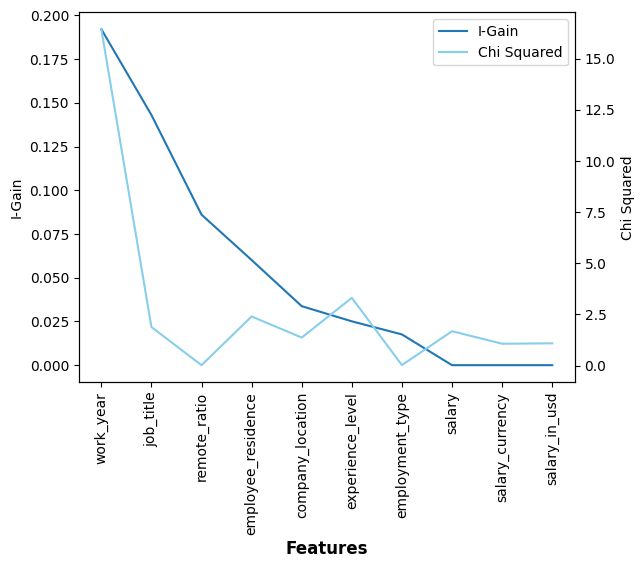

In [83]:
# Plotting the Filter score

fig, ax = plt.subplots()
rr = range(0,len(feature_names))
ax2 = ax.twinx()
ax.plot(df.index, df['Mutual Info.'],label='I-Gain')
ax2.plot(df.index, df['Chi Square'], color='skyblue', label='Chi Squared')
ax.set_xticks(rr)

ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('Chi Squared')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform = ax.transAxes)

In [84]:
from scipy import stats
stats.spearmanr(chi2_score, i_scores)

SpearmanrResult(correlation=0.41107388982369863, pvalue=0.23794186616753052)

## Metode Embedded (D-Tree)

In [85]:
df4 = pd.read_csv('ds_salaries.csv')
df4.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [86]:
df4 = df4.drop(columns=['Unnamed: 0'])

In [87]:
df4 = df4.dropna() # Menghapus nilai kosong pada dataset

In [88]:
data_column_category4 =df4.select_dtypes(exclude=[np.number]).columns # Memilih variabel dengan tipe data kecuali variabel dengan tipe data numerik lalu disimpan pada df_categorical_column
data_column_category4

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [89]:
from sklearn.preprocessing import LabelEncoder # Memanggil fungsi LabelEncoder yang berasal dari library sklearn untuk melakukan label encoding

label_encoder = LabelEncoder() # Menggunakan fungsi LabelEncoder yang di definisikan ke label_encoder
# Melakukan perulangan untuk setiap variabel yang bernilai kategrik untuk dilakukan trasnsform dengan menggunakan fungsi LabelEncoder akan dilakupan pada setiap variabel yang bernilai kategorik
for i in data_column_category4:
  df4[i] = label_encoder.fit_transform(df4[i])
print('Label Encoded Data: ')

df4.head()

Label Encoded Data: 


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,22,70000,7,79833,14,0,12,0
1,2020,3,2,41,260000,16,260000,32,0,29,2
2,2020,3,2,7,85000,8,109024,20,50,18,1
3,2020,2,2,47,20000,16,20000,23,0,20,2
4,2020,3,2,38,150000,16,150000,55,50,48,0


In [90]:
y = df4.pop('company_size').values
X = df4.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
feature_names = df4.columns
X_train.shape, X_test.shape

((485, 10), (122, 10))

In [91]:
ftree = DecisionTreeClassifier(criterion='entropy')
ftree = ftree.fit(X_train, y_train)
y_pred = ftree.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Test set accuract %4.2f"%(acc))

Test set accuract 0.58


[Text(0.5703272964015151, 0.9772727272727273, 'work_year <= 2021.5\n485\n[154, 263, 68]\n1'),
 Text(0.2812795928030303, 0.9318181818181818, 'employee_residence <= 19.5\n231\n[121, 54, 56]\n0'),
 Text(0.16270123106060605, 0.8863636363636364, 'company_location <= 24.0\n54\n[17, 20, 17]\n1'),
 Text(0.11896306818181818, 0.8409090909090909, 'salary_in_usd <= 88196.0\n47\n[17, 19, 11]\n1'),
 Text(0.07694128787878787, 0.7954545454545454, 'job_title <= 29.0\n34\n[8, 15, 11]\n1'),
 Text(0.03835227272727273, 0.75, 'job_title <= 14.5\n26\n[8, 10, 8]\n1'),
 Text(0.015151515151515152, 0.7045454545454546, 'salary <= 141000.0\n7\n[0, 5, 2]\n1'),
 Text(0.007575757575757576, 0.6590909090909091, '5\n[0, 5, 0]\n1'),
 Text(0.022727272727272728, 0.6590909090909091, '2\n[0, 0, 2]\n2'),
 Text(0.061553030303030304, 0.7045454545454546, 'salary <= 36000.0\n19\n[8, 5, 6]\n0'),
 Text(0.03787878787878788, 0.6590909090909091, 'work_year <= 2020.5\n4\n[2, 2, 0]\n0'),
 Text(0.030303030303030304, 0.6136363636363636, '

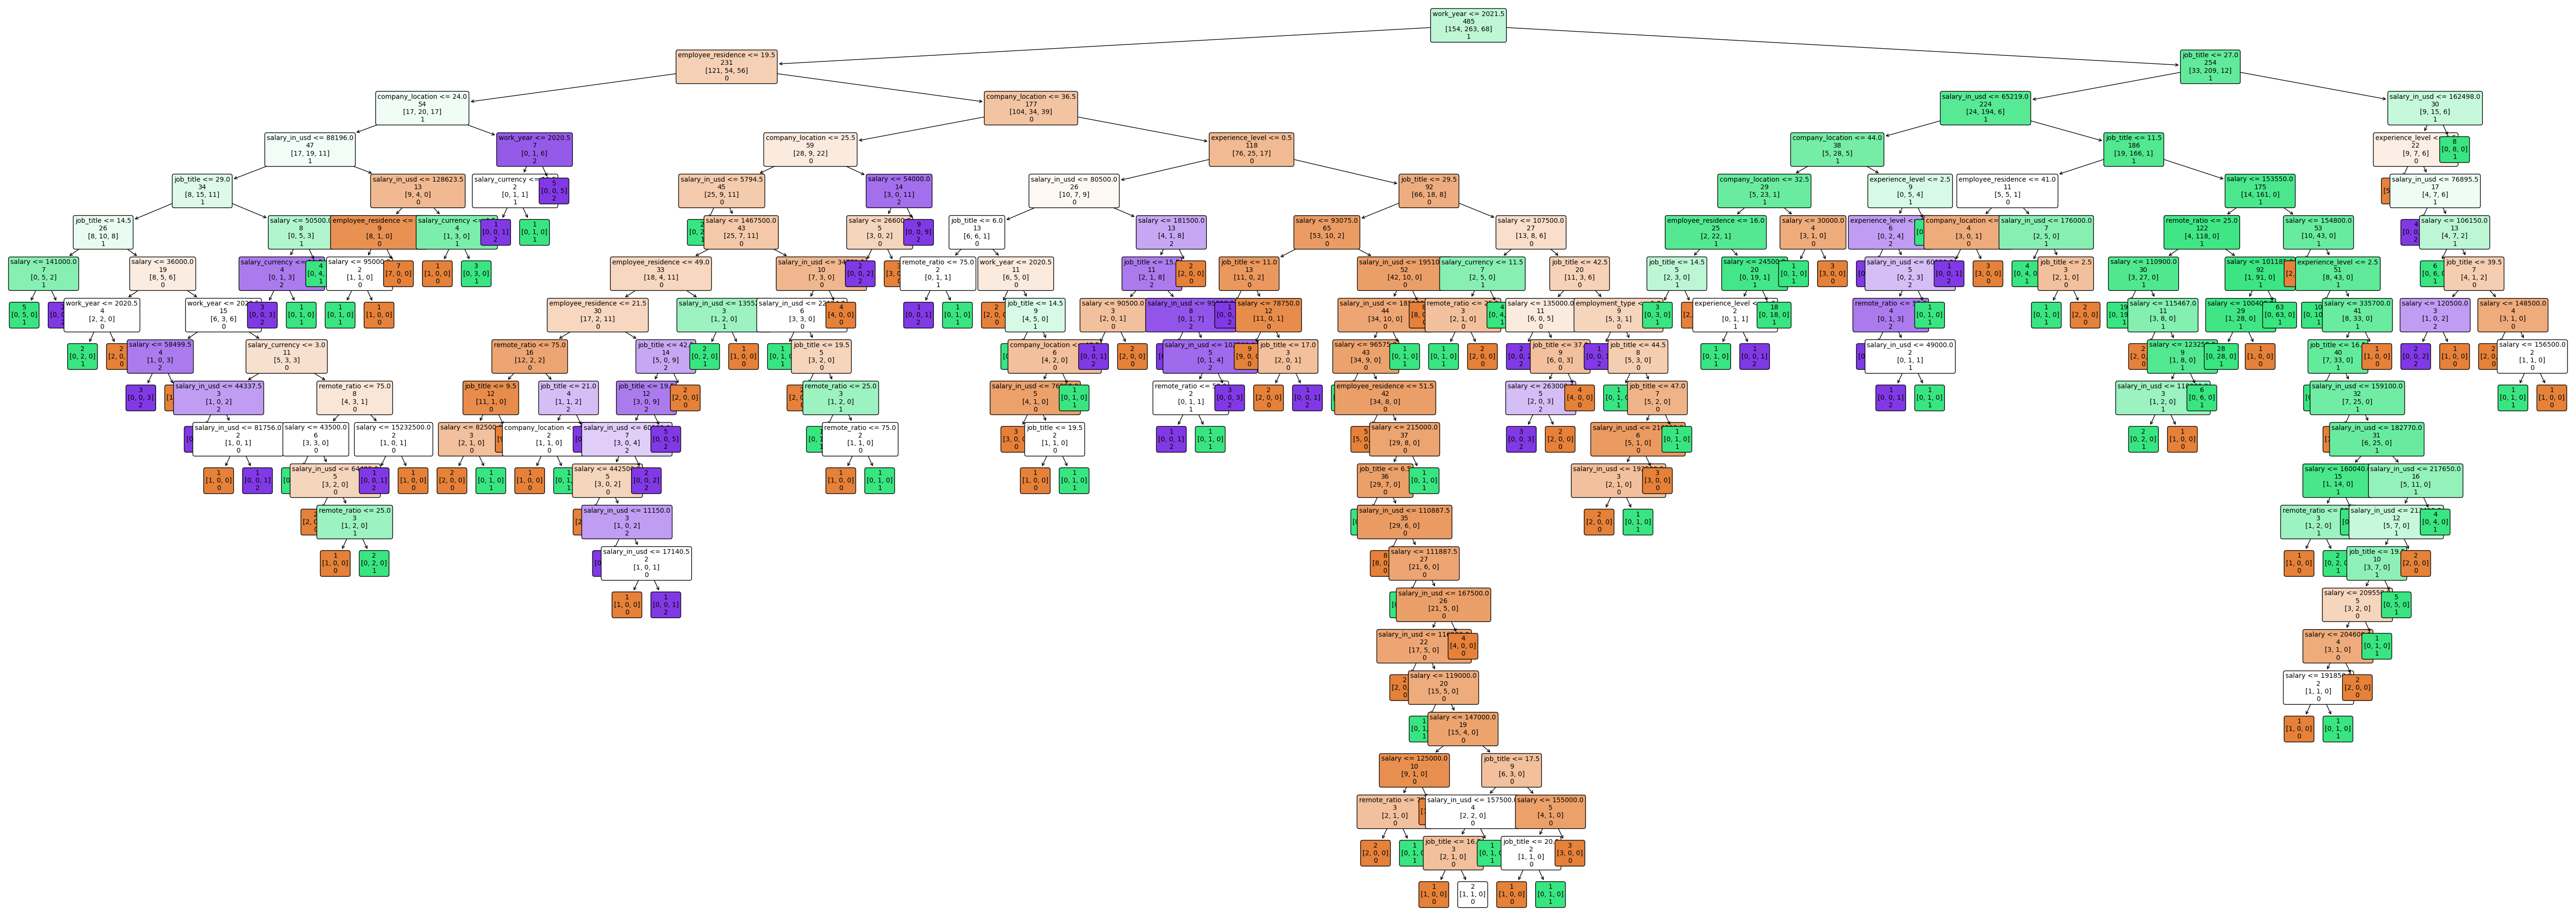

In [92]:
plt.figure(figsize=(70, 25))


tree.plot_tree(ftree, fontsize = 10, feature_names = feature_names,
                      class_names=['0', '1', '2'],
                      label = 'none', filled = True, impurity = False,
               rounded=True)

In [93]:
fi = ftree.feature_importances_
for fi_val, f_name in zip(fi, feature_names):
  print(" %4.2f %s" % (fi_val, f_name))

 0.21 work_year
 0.04 experience_level
 0.01 employment_type
 0.17 job_title
 0.22 salary
 0.02 salary_currency
 0.16 salary_in_usd
 0.05 employee_residence
 0.05 remote_ratio
 0.07 company_location


In [94]:
ftree.get_n_leaves()

153